Для датасету https://archive.ics.uci.edu/ml/datasets/Abalone побудувати модель класифікації

Таргет - вік (кількість кілець)

Додатково: таргет - стать (infant, male, female)

In [ ]:
# Підключаємо Google Drive з датасетом
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Імпортуємо всі необхідні бібліотеки
import pandas as pd
import seaborn as sns
import numpy as np

sns.set()

%config InlineBackend.figure_format = "png"

# зчитуємо набір даних
datasets_path = "/content/drive/MyDrive/Colab Notebooks/abalone/"
df = pd.read_csv(datasets_path + "abalone.data")

In [ ]:
# Проведемо первинний аналіз даних
print("Загальний опис датасету:", df.info(), "\n")
print(df.isna().sum(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
Загальний опис датасету: None 

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64 



Датасет має 7 чисельних фіч, що описують його характеристики, та дві категоріальних - фічу, яка описує пол молюска, та дискретну, що описує його вік. Датасет не має NaN значень.

Для першого завдання нашим таргетом буде вік молюска.

Також можемо побачити, що в датасеті немає імен колонок. Але вони є у файлі `abalon.names`, який йде разом з датасетом. Тож задамо імена для колонок згідно опису в файлі:
```
	Name            Data Type    Meas.    Description
	----            ---------    -----    -----------
	Sex             nominal               M, F, and I (infant)
	Length          continuous   mm       Longest shell measurement
	Diameter        continuous   mm       perpendicular to length
	Height          continuous   mm       with meat in shell
	Whole weight    continuous   grams    whole abalone
	Shucked weight  continuous   grams    weight of meat
	Viscera weight  continuous   grams    gut weight (after bleeding)
	Shell weight    continuous   grams    after being dried
	Rings           integer               +1.5 gives the age in years
```





In [ ]:
# Додаємо назви колонок для датафрейму
df.columns =["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

In [ ]:
# Тепер подивимось на перші записи
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [ ]:
# Та подивимось на описову статистику
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [ ]:
# Подивимось чи є в датасеті фічі, які мають нульове значення
df[df.eq(0).any(1)].head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1256,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3995,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


Є два записи з Height, які дорівнюють нулю. Це не повні дані для побудови моделі. Розмір датасету дозволяє безболісно прибрати ці записи, тож давайте це й зробимо.

In [ ]:
# Видаляємо дані з Height = 0
df = df[(df != 0).all(1)]

In [ ]:
# Тепер можемо змінити типи даних, щоб зменшити объем датасету, але це не критично для датасету такого розміру
df = df.astype(
    {
        "Length": "float32",
        "Diameter": "float32",
        "Height": "float32",
        "Whole weight": "float32",
        "Shucked weight": "float32",
        "Viscera weight": "float32",
        "Shell weight": "float32",
        "Rings": "int8",
    },
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4174 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4174 non-null   object 
 1   Length          4174 non-null   float32
 2   Diameter        4174 non-null   float32
 3   Height          4174 non-null   float32
 4   Whole weight    4174 non-null   float32
 5   Shucked weight  4174 non-null   float32
 6   Viscera weight  4174 non-null   float32
 7   Shell weight    4174 non-null   float32
 8   Rings           4174 non-null   int8   
dtypes: float32(7), int8(1), object(1)
memory usage: 183.4+ KB


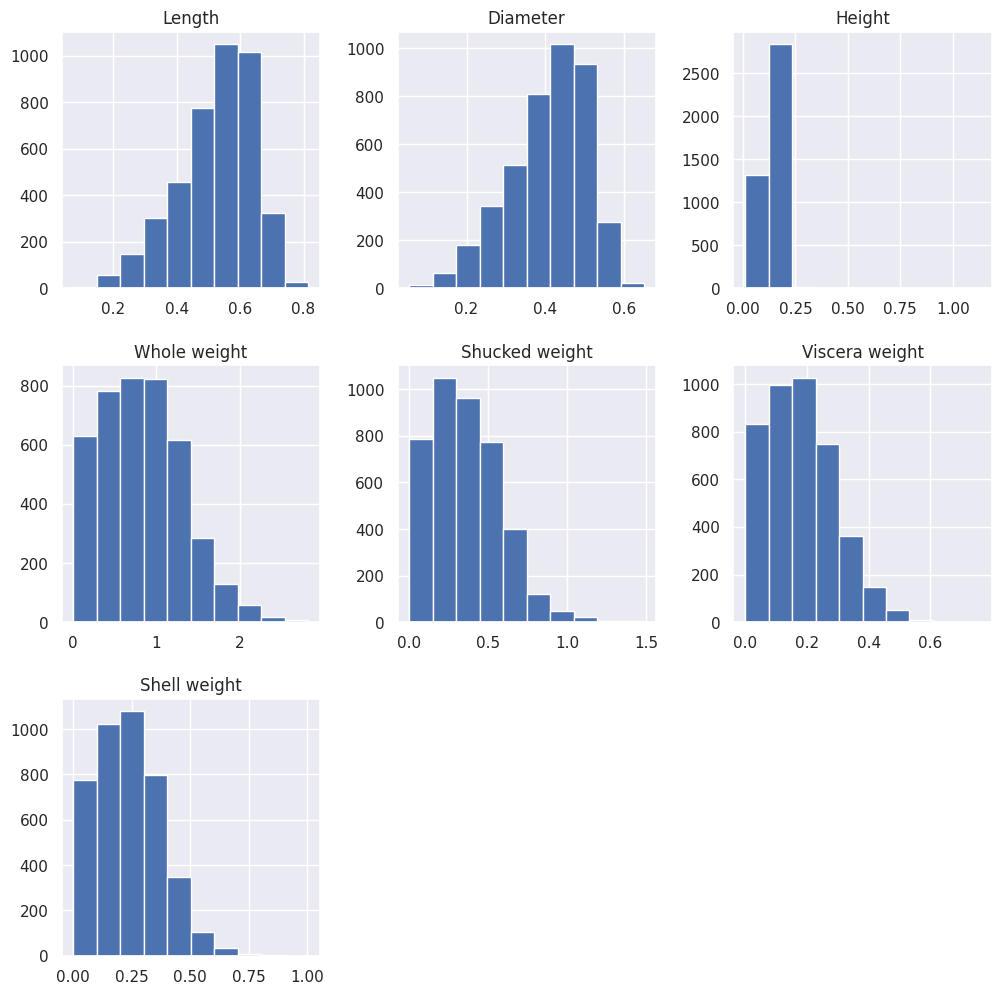

In [ ]:
# Тепер подивимось на розподіл значень фічей
df.drop(columns="Rings").hist(figsize=(12, 12));

<Axes: >

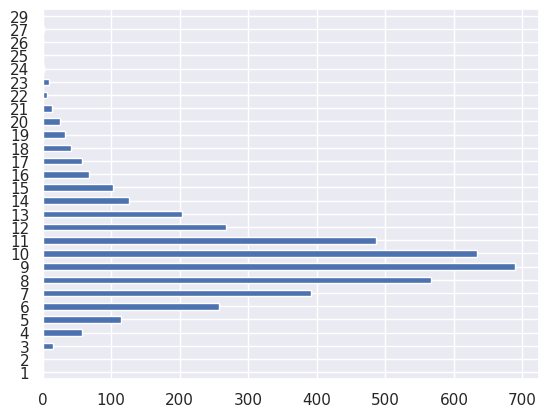

In [ ]:
# Також подивимось на розподіл по таргету
df["Rings"].value_counts(ascending=True).sort_index().plot(kind="barh")

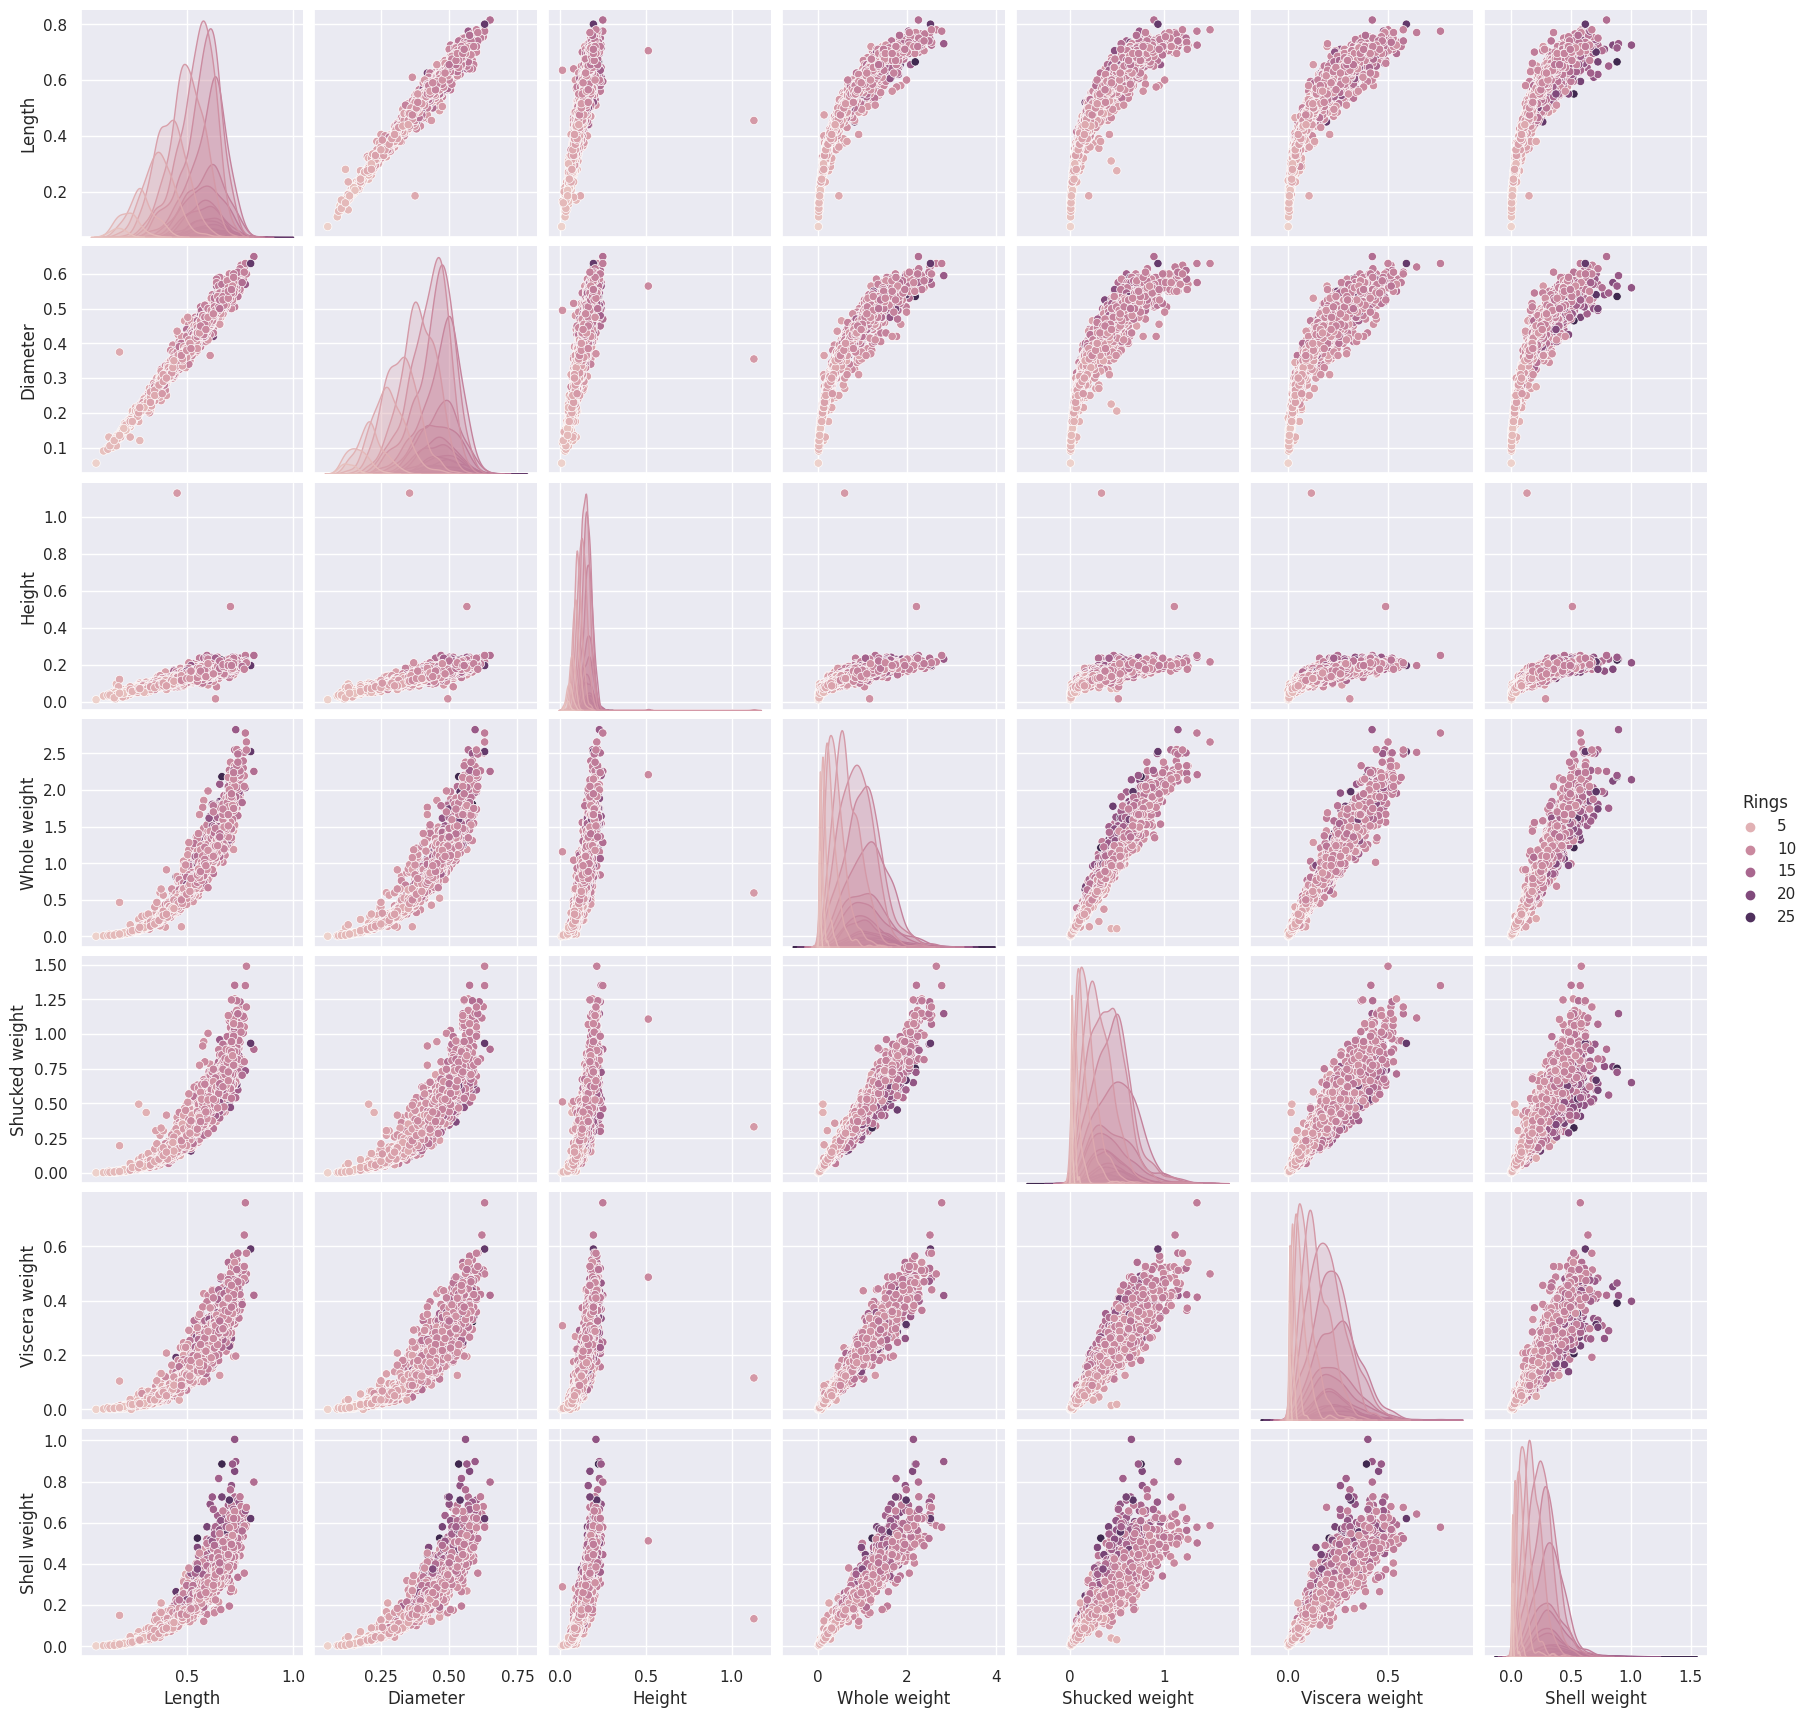

In [ ]:
# Також давайте подивимось на кореляцію фічей
sns.pairplot(df, hue="Rings");

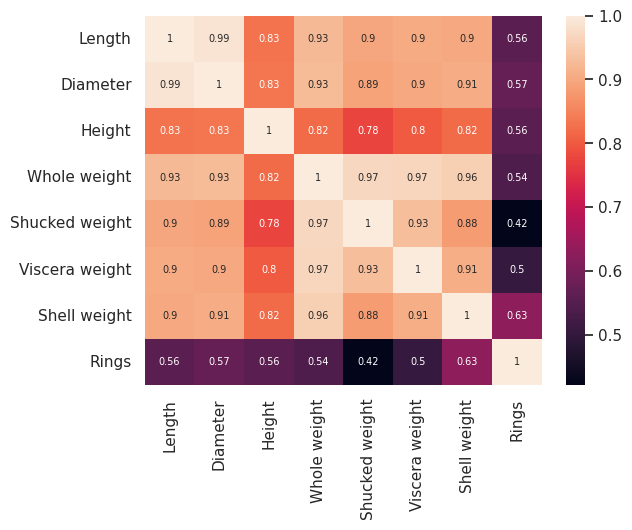

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 7});

Як бачимо, тут між собою корелює купа речей. Спробуємо трохи виправити ситуацію за допомогою Feature engineering.

In [ ]:
# Feature engineering

# додаму фічу, яка описує площу круглої частини молюска та приберемо фічу `Diameter`
df["Circle part square"] = np.pi * pow((df["Diameter"] / 2), 2)
df = df.drop(columns=["Diameter"])

# додамо фічу, яка описує вагу всього молюска як суму м'яса та внутрощів
df["Clam weight"] = df["Shucked weight"] + df["Viscera weight"]

# тепер ми можемо видалити ці колонки `Shucked weight` та `Viscera weight` з датасету
df = df.drop(columns=["Shucked weight", "Viscera weight"])

# Зробимо фічу `Root length` з фічи `Length`
df["Root length"] = df["Length"].apply(np.sqrt)
df = df.drop(columns="Length")

In [ ]:
# Давайте додамо ще фічу `Trash weight`, яка буде залишком віднімання від фічі `Whole weight` ваги  ракушки та ваги молюска
# Бо саме вага ракушки + вага молюска + вага всього додаткового, що потрапило всередину молюска і є загальною вагою
# Під `Trash weight` маэмо на увазі якісь часточки, пісок, перлини, або ноги, якщо молюск ії відкидає після дорослішання
df["Trash weight"] = df["Whole weight"] - df["Shell weight"] - df["Clam weight"]

# Подивимось, чи є у нас молюски, в яких ця фіча має від'ємне значення
df[df["Trash weight"] < 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 41 to 4142
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 156 non-null    object 
 1   Height              156 non-null    float32
 2   Whole weight        156 non-null    float32
 3   Shell weight        156 non-null    float32
 4   Rings               156 non-null    int8   
 5   Circle part square  156 non-null    float32
 6   Clam weight         156 non-null    float32
 7   Root length         156 non-null    float32
 8   Trash weight        156 non-null    float32
dtypes: float32(7), int8(1), object(1)
memory usage: 6.9+ KB


In [ ]:
# Так, маємо 156 таких молюсків. Замінемо це значення на 0, бо це більш схоже на аутлайнери.
df.loc[df["Trash weight"] < 0, "Trash weight"] = 0

# Тепер можемо прибрати фічу `Whole weight` з датасету
df = df.drop(columns="Whole weight")

<Axes: >

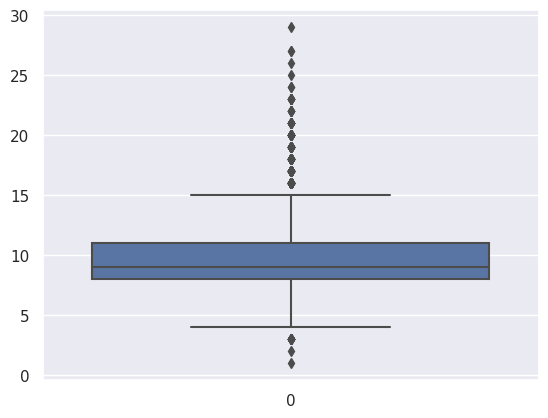

In [ ]:
# Також давайте подивимось, скільки у нас статистичних викидів по таргету
sns.boxplot(df["Rings"])

Як ми бачимо у нас є деякі аутлайнери, які мають до 5 кілець та більше 15. Давайте подивимось їх кількість. Якщо їх не багато, то краще такі аутлайнери прибрати.

In [ ]:
df[df["Rings"] < 5]["Rings"].count() # маємо 74 аутлайнери з кількістью кілець < 5
df[df["Rings"] > 15]["Rings"].count() # та 261 аутлайнер з > 15 кілець

# В принципі розмір датасету дозволяє безболісно прибрати ці екземпляри
df = df[df["Rings"] <= 15]
df = df[df["Rings"] >= 5]
df["Rings"].info()

<class 'pandas.core.series.Series'>
Int64Index: 3839 entries, 0 to 4175
Series name: Rings
Non-Null Count  Dtype
--------------  -----
3839 non-null   int8 
dtypes: int8(1)
memory usage: 33.7 KB


In [ ]:
# Зробимо копію датасету для додаткового завдання
df_orig = df.copy(deep=True)

# також зробимо конвертацію категорільних фічей (one-hot encoding) в індикативні значення
df = pd.get_dummies(df, prefix=["Sex"]);

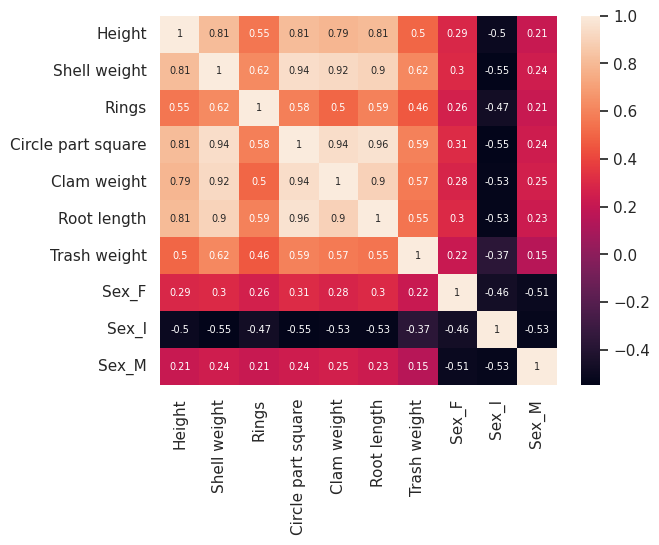

In [ ]:
# Подивимось ще раз на матрицю кореляції
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 7});

Після feature engineering ми зменшили кореляцію фіч датасету. Так, деякі фічі досі корелюють між собою, але в меншій мірі ніж до внесениз змін. Тепер час переходити до масштабування фіч та тренування моделей.

In [ ]:
# Розбиваємо датасет на X та Y
X = df.drop(columns="Rings")  # фічі
Y = df["Rings"]  # таргет

In [ ]:
# Зробимо масштабування фіч використовуючи MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
# Ділемо датасет на тренувальну, валідаційну та тестові частини за схемою 60-20-20
from sklearn.model_selection import train_test_split

x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5)

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

def tune_params(model, params, x_valid, y_valid):
    """Tune model hyperparams."""
    try:
      grid_search = GridSearchCV(
          estimator=model,
          param_grid=params,
      )
      grid_search.fit(x_valid, y_valid)

      print(f"Результати для {model.__class__.__name__}:", "\n")
      print("Найкращий score:", grid_search.best_score_,)
      print("Найкращі параметри:", grid_search.best_params_, "\n")

      return grid_search.best_estimator_
    except Exception:
      pass


def show_results(model, x_train, y_train, metrical=False):
    """Show model scores and report."""
    # Навчаємо модель на тренувальних даних
    model.fit(x_train, y_train)
    predict = model.predict(x_test)

    # Значення середньоквардатичної похибки
    print(
        "Середньоквадратична похибка:",
        mean_squared_error(y_test, predict),
    )

    if metrical:
      # Точність моделі
      print(
          "Точність моделі на тестових даних:",
          accuracy_score(y_test, predict)),

      # Метрики моделі
      print(
          "Метрики моделі:",
          "\n",
          classification_report(y_test, predict),
      )
    else:
      # Подивимось на точність моделі на тестових даних
      print(
          "Точність моделі на тестових даних:",
          model.score(x_test, y_test) * 100,
      )

In [ ]:
# Спочатку спробуємо модель лінійної регресії з підбором гіперпараметрів
from sklearn.linear_model import LinearRegression

lr_params = {
    "fit_intercept": [True, False],
    "n_jobs": [1, 2, 4, 6, 8, 10],
    "positive": [True, False],
}
best_lr_model = tune_params(
    model=LinearRegression(),
    params=lr_params,
    x_valid=x_valid,
    y_valid=y_valid,
)
show_results(best_lr_model, x_train, y_train)

Результати для LinearRegression: 

Найкращий score: 0.5067895562567454
Найкращі параметри: {'fit_intercept': True, 'n_jobs': 1, 'positive': False} 

Середньоквадратична похибка: 2.5887132
Точність моделі на тестових даних: 51.919365947596674


Навіть якщо ми використовуємо звичайну лінійну регресію то вже маємо більше 51%. Спробуємо логістичну регресію.

In [ ]:
# Побудуємо модель LogisticRegression одразу з підбором гіперпараметрів
from sklearn.linear_model import LogisticRegression

log_r_params = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "dual": [True, False],
    "C": [0.1, 0.5, 1.0],
    "fit_intercept": [True, False],
    "intercept_scaling": [1, 2, 5, 10],
    "multi_class": ["auto", "ovr", "multinomial"],
    "l1_ratio": [0.1, 0.2, 0.5],
}

best_logr_model = tune_params(
    model=LogisticRegression(),
    params=log_r_params,
    x_valid=x_valid,
    y_valid=y_valid,
)
show_results(best_logr_model, x_train, y_train)

Результати для LogisticRegression: 

Найкращий score: 0.29296324590442235
Найкращі параметри: {'C': 0.1, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1, 'l1_ratio': 0.1, 'multi_class': 'auto', 'penalty': None} 

Середньоквадратична похибка: 3.1497395833333335
Точність моделі на тестових даних: 28.776041666666668


In [ ]:
# Спробуємо модель KNeighborsClassifier одразу с підбором гіперпараметрів
from sklearn.neighbors import KNeighborsClassifier

kn_params = {
    "n_neighbors": [5, 10, 25, 50, 100, 200],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
    "metric": ["euclidean", "haversine", "l1", "l2", "manhattan",],
    "n_jobs": [None, 1, 2, 5, 10],
}

best_knc_model = tune_params(
    model=KNeighborsClassifier(),
    params=kn_params,
    x_valid=x_valid,
    y_valid=y_valid,
)
show_results(best_knc_model, x_train, y_train, metrical=True)

Результати для KNeighborsClassifier: 

Найкращий score: 0.2969017910194381
Найкращі параметри: {'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': None, 'n_neighbors': 25, 'p': 1, 'weights': 'uniform'} 

Середньоквадратична похибка: 3.4453125
Точність моделі на тестових даних: 0.2513020833333333
Метрики моделі: 
               precision    recall  f1-score   support

           5       0.50      0.44      0.47        25
           6       0.31      0.29      0.30        56
           7       0.33      0.38      0.35        82
           8       0.26      0.28      0.27       120
           9       0.26      0.43      0.32       126
          10       0.15      0.17      0.16       130
          11       0.19      0.19      0.19        89
          12       0.15      0.04      0.06        53
          13       0.44      0.16      0.23        44
          14       0.00      0.00      0.00        27
          15       0.00      0.00      0.00        16

    accuracy                    

In [ ]:
# Спробуємо також модель RadiusNeighborsClassifier з підбором гіперпараметрів
from sklearn.neighbors import RadiusNeighborsClassifier

rn_params = {
    "radius": [1, 2, 5, 10, 25, 50],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
    "metric": ["euclidean", "haversine", "l1", "l2", "manhattan"],
    "n_jobs": [None, 1, 2, 5, 10]
}

best_rnc_model = tune_params(
    model=RadiusNeighborsClassifier(),
    params=rn_params,
    x_valid=x_valid,
    y_valid=y_valid,
)
show_results(best_rnc_model, x_train, y_train, metrical=True)

Результати для RadiusNeighborsClassifier: 

Найкращий score: 0.28130039894745773
Найкращі параметри: {'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': None, 'p': 1, 'radius': 2, 'weights': 'distance'} 

Середньоквадратична похибка: 4.296875
Точність моделі на тестових даних: 0.2513020833333333
Метрики моделі: 
               precision    recall  f1-score   support

           5       0.00      0.00      0.00        25
           6       0.33      0.27      0.29        56
           7       0.36      0.43      0.39        82
           8       0.33      0.23      0.27       120
           9       0.20      0.71      0.31       126
          10       0.28      0.18      0.22       130
          11       0.40      0.04      0.08        89
          12       0.00      0.00      0.00        53
          13       0.00      0.00      0.00        44
          14       0.00      0.00      0.00        27
          15       0.00      0.00      0.00        16

    accuracy                    

In [ ]:
# І ще NearestCentroid
from sklearn.neighbors import NearestCentroid

nc_params = {
    "metric": ["euclidean", "haversine", "l1", "l2", "manhattan"],
    "shrink_threshold": [None, 1.0, 5.0, 10.0, 25.0, 100.0, 500],
}

best_nc_model = tune_params(
    model=NearestCentroid(),
    params=nc_params,
    x_valid=x_valid,
    y_valid=y_valid,
)
show_results(best_nc_model, x_train, y_train, metrical=True)

Результати для NearestCentroid: 

Найкращий score: 0.15888294711824122
Найкращі параметри: {'metric': 'manhattan', 'shrink_threshold': 5.0} 

Середньоквадратична похибка: 4.829427083333333
Точність моделі на тестових даних: 0.20963541666666666
Метрики моделі: 
               precision    recall  f1-score   support

           5       0.17      0.20      0.18        25
           6       0.00      0.00      0.00        56
           7       0.23      0.73      0.35        82
           8       0.18      0.16      0.17       120
           9       0.18      0.06      0.08       126
          10       0.18      0.05      0.08       130
          11       0.21      0.71      0.33        89
          12       0.00      0.00      0.00        53
          13       0.00      0.00      0.00        44
          14       0.00      0.00      0.00        27
          15       0.00      0.00      0.00        16

    accuracy                           0.21       768
   macro avg       0.11      0.17 

# Висновок

З моделей регресії найкраще себе показала лінійна регресія. Моделі класифікації мають меншу аккуратніть.

Серед метричних моделей накращий результат має KNeighborsClassifier. З урахування даних з рапорту класицікаї, можно зробити припущення, що такий низкий рівень якості класифікаційних моделей на цьому датасеті може бути пов'язаний з не дуже рівномірним розподілом даних по таргету. Також, можливо, додатковий feature engineering зміг би покращити результат.

# Додатково

Додатково спробуємо зробити класифікацію по таргету стать (infant, male, female).

In [ ]:
df_orig.head()

,Sex,Height,Shell weight,Rings,Circle part square,Clam weight,Root length,Trash weight
0,M,0.090,0.070,7,0.055155,0.1480,0.591608,0.0075
1,F,0.135,0.210,9,0.138544,0.3980,0.728011,0.0690
2,M,0.125,0.155,10,0.104635,0.3295,0.663325,0.0315
3,I,0.080,0.055,7,0.051071,0.1290,0.574456,0.0210
4,I,0.095,0.120,8,0.070686,0.2185,0.651920,0.0130


In [ ]:
# Зробимо енкодінг категоріальний таргету Sex, щоб подивитись кореляцію
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_orig["Sex"] = le.fit_transform(df_orig["Sex"])  # M - 2, F - 0, I - 1

<Axes: >

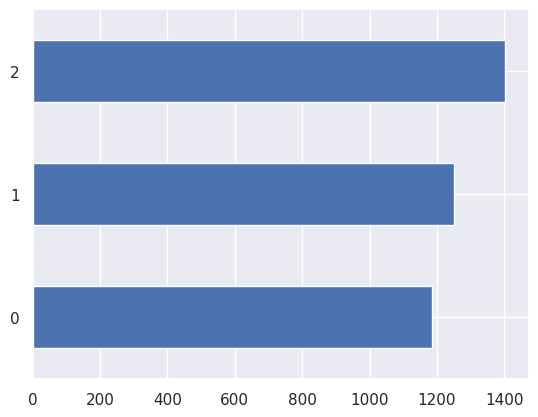

In [ ]:
# Подивимось на роздподіл по таргету
df_orig["Sex"].value_counts(ascending=True).sort_index().plot(kind="barh")

Бачимо, що в цілому датасет майже збалансований по цьому таргету. Спробуємо подивитись, чи корелює щось з таргетом.

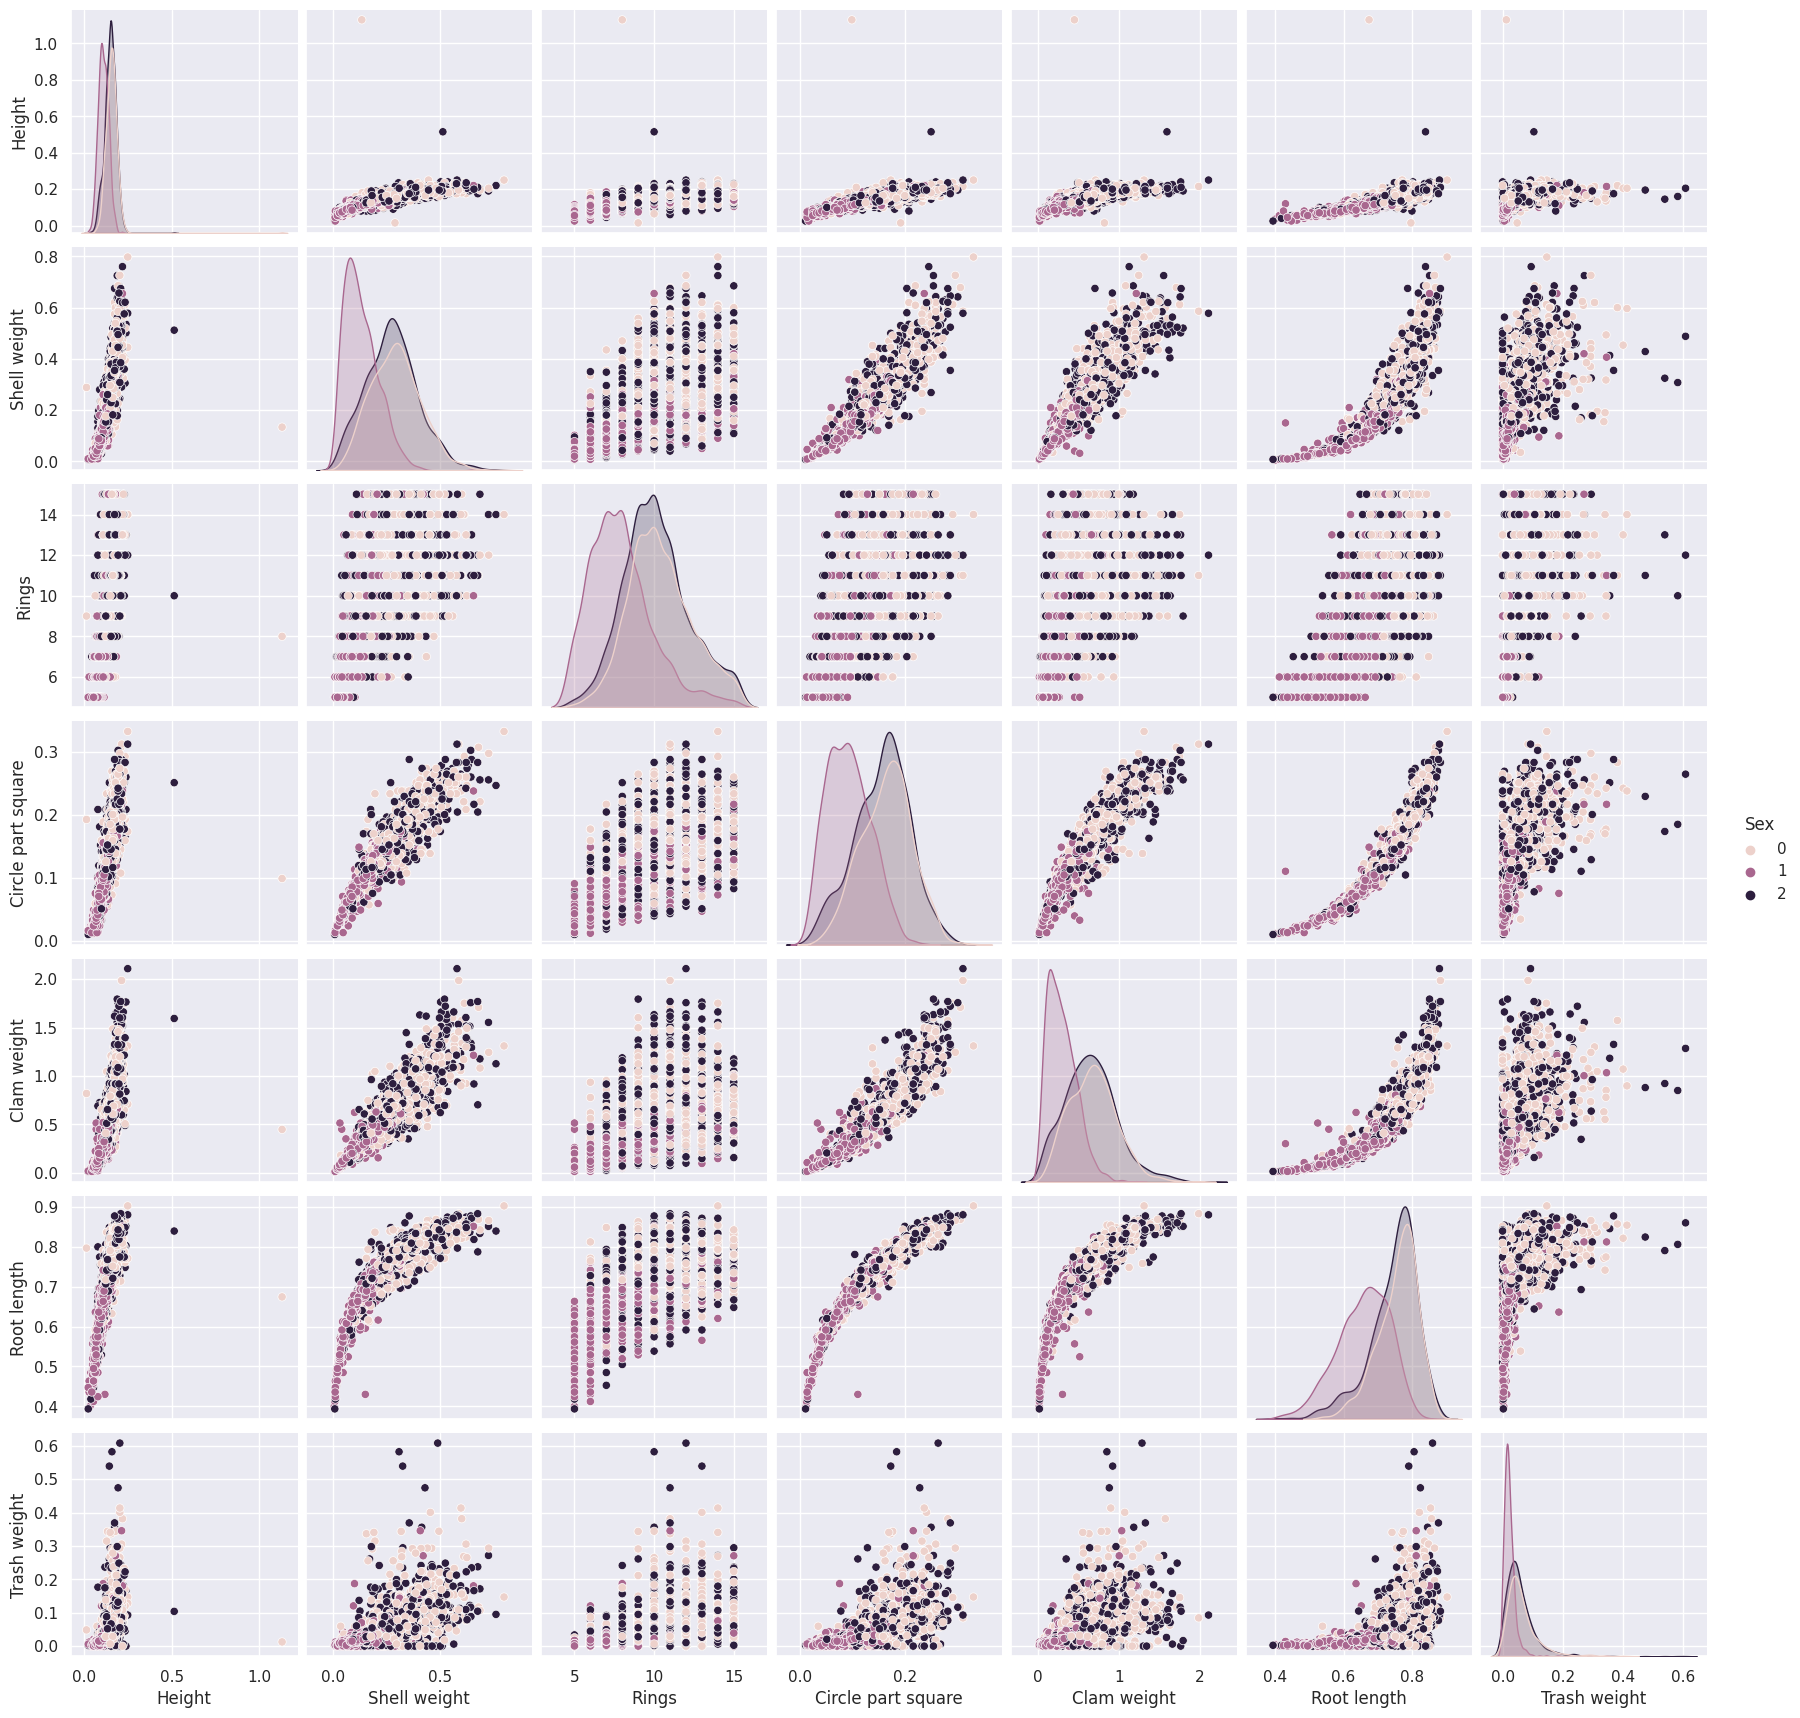

In [ ]:
# Подивимось на кореляцію фічей з таргетом
sns.pairplot(df_orig, hue="Sex");

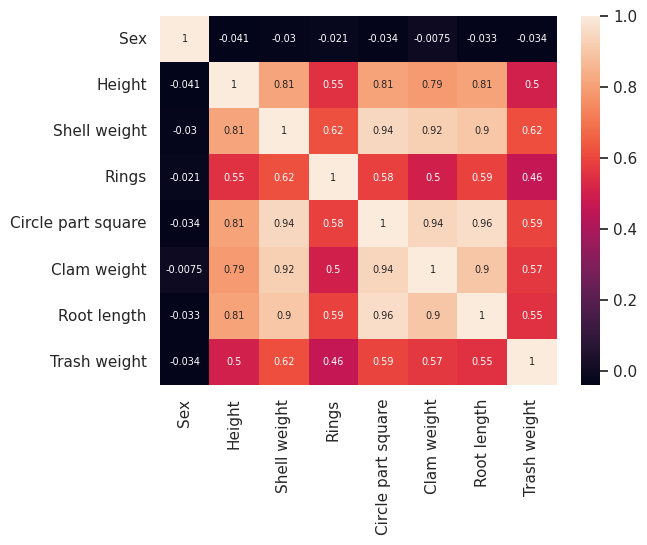

In [ ]:
# Побудуємо матрицю корреляції та хітмап
corr_matrix = df_orig.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 7});

Можемо зробити висновок, що жодна інша фіча ніяк не впливає на стать молюска. Але спробуємо натренувати моделі.

In [ ]:
# Розбиваємо датасет на X та Y
X = df_orig.drop(columns="Sex")  # фічі
Y = df_orig["Sex"]  # таргет

In [ ]:
# Зробимо масштабування фіч використовуючи MinMaxScaler
X = scaler.fit_transform(X)

In [ ]:
# Ділемо датасет на тренувальну, валідаційну та тестові частини за схемою 60-20-20
x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5)

In [ ]:
# LinearRegression
show_results(best_lr_model, x_train, y_train)

Середньоквадратична похибка: 0.6681188266359653
Точність моделі на тестових даних: 0.4263900339267157


In [ ]:
# LogisticRegression
show_results(best_logr_model, x_train, y_train)

Середньоквадратична похибка: 1.1236979166666667
Точність моделі на тестових даних: 57.161458333333336


In [ ]:
# KNeighborsClassifier
show_results(best_knc_model, x_train, y_train, metrical=True)

Середньоквадратична похибка: 1.23828125
Точність моделі на тестових даних: 0.5625
Метрики моделі: 
               precision    recall  f1-score   support

           0       0.43      0.40      0.41       230
           1       0.70      0.83      0.76       248
           2       0.52      0.47      0.49       290

    accuracy                           0.56       768
   macro avg       0.55      0.56      0.55       768
weighted avg       0.55      0.56      0.55       768



In [ ]:
# RadiusNeighborsClassifier
show_results(best_rnc_model, x_train, y_train, metrical=True)

Середньоквадратична похибка: 1.203125
Точність моделі на тестових даних: 0.546875
Метрики моделі: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.66      0.77      0.71       248
           2       0.48      0.79      0.60       290

    accuracy                           0.55       768
   macro avg       0.38      0.52      0.44       768
weighted avg       0.39      0.55      0.45       768



In [ ]:
# NearestCentroid
show_results(best_nc_model, x_train, y_train, metrical=True)

Середньоквадратична похибка: 1.36328125
Точність моделі на тестових даних: 0.48828125
Метрики моделі: 
               precision    recall  f1-score   support

           0       0.42      0.66      0.51       230
           1       0.62      0.76      0.68       248
           2       0.34      0.12      0.18       290

    accuracy                           0.49       768
   macro avg       0.46      0.51      0.46       768
weighted avg       0.45      0.49      0.44       768



Можемо побачити, що моделі показують поганий результат. Найкраще відпрацювала модель логістичної регресії.

# Висновок
Згідно аналізу датасету та результатів моделі можно сказати, що поточного датасету недостатньо, щоб зробити якісну класифікацію на M, F та I статі молюска.